In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For splitting and scaling the data 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#To display all the columns
pd.set_option('display.max_columns',None) 

# Data Understanding

In [2]:
churn = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Start Cleaning (Data pre)

In [7]:
churn["TotalCharges"] = pd.to_numeric(churn["TotalCharges"],errors="coerce")
churn["SeniorCitizen"] = churn["SeniorCitizen"].map({1:'Yes', 0:'No'})

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
churn.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
churn.shape

(7043, 21)

In [10]:
churn.dropna(inplace=True)

In [11]:
churn.shape

(7032, 21)

In [12]:
churn.duplicated().sum()

0

In [13]:
churn.drop(columns='customerID',inplace=True)

In [14]:
churn.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# check outliers using boxplot

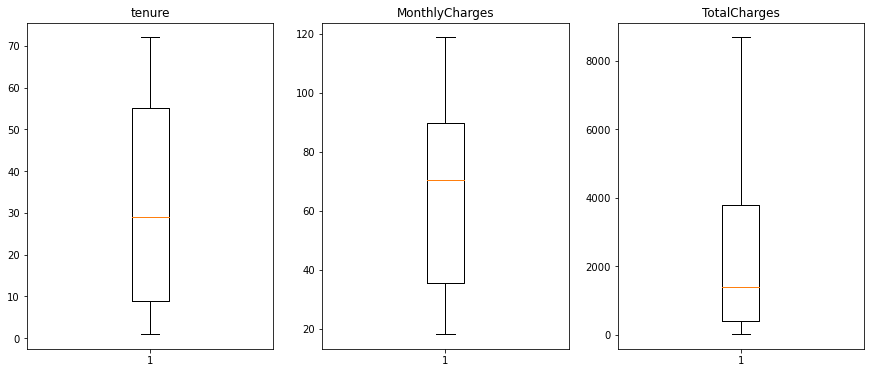

In [15]:
numeric_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, ax = plt.subplots(1,3, figsize=(15, 6))

for i, col in enumerate(numeric_col):
    ax[i].boxplot(churn[col]) 
    ax[i].set_title(col)

tenure is positively skewed as mean is greater than median

MonthlyCharges is negatively skewed as mean is lower than median

TotalCharges is positively skewed as mean is greater than median

But there are no outliers

# Feature Engineering (Preprocessing)

In [16]:
for col in churn:
    if churn[col].dtype == "object":
        print(col + " :", churn[col].unique())

gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
churn.replace("No phone service","No",inplace=True)
churn.replace("No internet service","No",inplace=True)

Values like "No internet service", "No phone service" is also equal "NO" so we will replace it for much easier

In [18]:
churn["gender"].replace({"Male":0,"Female":1},inplace=True)

convert Gender column to 0 for male and 1 for Female

In [19]:
for col in churn:
    if churn[col].dtype == "object":
        print(col + " :", churn[col].unique())

SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Knowing and handling column classes

In [22]:
col_to_convert = ['SeniorCitizen','Partner','Dependents',
       'PhoneService', 'MultipleLines','OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies','PaperlessBilling','Churn']
for col in col_to_convert:
    churn[col].replace({'Yes':1,'No':0},inplace=True)

also all 'yes' should be 1 and 'No' should be 0

In [24]:
for col in churn:
    if churn[col].dtype == "object":
        print(col + " :", churn[col].unique())

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [25]:
dummies_df = pd.get_dummies(data=churn,columns=['InternetService','Contract','PaymentMethod'])

Values like "No internet service", "No phone service" is also equal "NO" so we will replace it for much easier

In [26]:
dummies_df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
724,0,1,1,0,33,1,1,0,0,0,0,1,1,1,94.50,3105.55,1,0,1,0,1,0,0,0,0,1,0
3598,0,1,0,0,1,1,0,0,0,0,0,0,0,0,46.30,46.30,0,1,0,0,1,0,0,0,0,1,0
6599,1,0,1,0,13,1,1,0,1,1,0,1,0,0,94.10,1215.60,1,0,1,0,1,0,0,0,0,1,0
509,1,0,0,0,1,1,0,0,0,0,0,0,0,0,19.85,19.85,0,0,0,1,1,0,0,0,0,0,1
4204,0,1,0,0,5,1,0,0,1,0,0,0,1,1,85.55,408.50,0,0,1,0,1,0,0,0,0,1,0


In [27]:
scalers_cols =['tenure','MonthlyCharges','TotalCharges']
scaler = StandardScaler()
dummies_df[scalers_cols] = scaler.fit_transform(dummies_df[scalers_cols])

Convert the rest of the columns to deal with them in the form 0 and 1

In [28]:
dummies_df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5112,1,0,0,0,-1.035784,1,0,0,0,0,0,0,0,0,-1.487450,-0.934634,1,0,0,1,1,0,0,0,0,0,1
4757,0,0,0,0,-1.280248,1,1,0,1,0,1,0,0,0,-0.156171,-0.980848,1,1,0,0,1,0,0,0,0,0,1
1897,0,1,1,0,-0.098673,1,0,0,1,0,0,0,0,1,-0.478603,-0.333450,1,1,0,0,1,0,0,1,0,0,0
4268,0,0,1,1,0.105047,1,0,0,1,0,1,1,0,1,0.827747,0.389260,0,0,1,0,0,1,0,0,0,1,0
4939,0,0,0,0,-1.280248,1,0,0,0,0,0,0,0,0,-1.525677,-0.999025,0,0,0,1,1,0,0,0,0,0,1


In [29]:
churn_model = dummies_df.copy()

# Start Our Model

In [30]:
X = churn_model.drop('Churn',axis=1)
y = churn_model["Churn"]

In [31]:
churn_model.shape

(7032, 27)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 5)

In [33]:
X_train.shape

(5625, 26)

In [34]:
X_test.shape

(1407, 26)

In [35]:
model_params = {
    "svm":{
        "model": SVC(gamma="auto"),
        "params": {
            "C": [1,10,20],
            "kernel": ["linear","rbf"]
        }
    },
    "random_forest":{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(),
        'params':{
            'C':[1,5,10]
        }
        
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(random_state=0),
        'params':{
             'max_depth':[3,4,5]
        }
    }
}

In [36]:
scores = []

In [37]:
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best score': clf.best_score_,
        'best params': clf.best_params_ })

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [38]:
df = pd.DataFrame(scores,columns=["model","best score",'best params'])

In [39]:
df

,model,best score,best params
0,svm,0.804622,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.782222,{'n_estimators': 10}
2,logistic_regression,0.806756,{'C': 1}
3,decision_tree,0.792356,{'max_depth': 3}


as we can see best model is svm with C=20 and kernel= 'rbf OR logistic_regression with C=1 so we can continue with logistic_regression model

In [40]:
Lg = LogisticRegression(C=1)
Lg.fit(X_train,y_train)

LogisticRegression(C=1)

In [41]:
y_pred = Lg.predict(X_test)

In [42]:
print('Accuricy of model score on train set:{}'.format(Lg.score(X_train,y_train)*100))
print('Accuricy of model score on test set:{}'.format(Lg.score(X_test,y_test)*100))

Accuricy of model score on train set:80.71111111111111
Accuricy of model score on test set:79.67306325515281
